In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.model_selection import train_test_split
vector = np.vectorize(np.float64)
df = pd.read_csv('FTIR_data.csv')
classData=df.loc[1931:].values.tolist()
classData=classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1 ]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:1931]

lables = vector(lab)
PCA_dat = df[0:1931]

PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
Input.shape, encodeClassdata.shape
Input_T = Input.T

X_train, X_test, y_train, y_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

PCA_dat.head
Input.shape, encodeClassdata.shape
Input_T
X_train.shape


(48, 1931)

In [10]:
vector = np.vectorize(np.float64)
df = pd.read_csv('Raman_Ndata.csv')
classData = df.loc[264, :].values.tolist()
classData = classData[1:]
encodeClassdata = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
                   0, 0, 0,1,1,1, 1, 1, 1, 1,1,1,1,1,1, 1,1,1,1,1,1,1,1,1,1, 1,1,1,1,1,1,1,1]
encodeClassdata = np.array(encodeClassdata)

labelHeader = df['Raman'].to_list()
vector = np.vectorize(np.float64)
labels = df['Raman']
lab = labels[0:264]
#lab
lables = vector(lab)
PCA_dat = df[0:264]
#PCA_dat.head
PCA_dat = PCA_dat.iloc[:, 1:]
Input = np.asarray(PCA_dat)
#Input.shape, encodeClassdata.shape
Input_T = np.transpose(Input)
#Input_T.shape
#classData
X2_train, X2_test, y2_train, y2_test = train_test_split(Input_T, encodeClassdata,test_size=0.2, random_state=42)

count_row = X_train.shape[0]
X2_train.shape

(48, 264)

In [11]:
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
def feature_selection(X_train, X2_train, y_train):
    X_train_fused = np.concatenate([X_train, X2_train], axis=1)
    selector_source1 = SelectKBest(score_func=f_classif, k=100)
    X_train = selector_source1.fit_transform(X_train_fused, y_train)
    
    return X_train

In [12]:
'''
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

def feature_selection(X_train_source1, X_train_source2, y_train):
    # Select the top 5 features from each source using SelectKBest.
    selector_source1 = SelectKBest(score_func=f_classif, k=50)
    selector_source2 = SelectKBest(score_func=f_classif, k=50)
    
    X_train_source1 = selector_source1.fit_transform(X_train_source1, y_train)
    X_train_source2 = selector_source2.fit_transform(X_train_source2, y_train)

    # Fuse the selected features from each source.
    X_train_fused = np.concatenate([X_train_source1, X_train_source2], axis=1)

    return X_train_fused




SyntaxError: incomplete input (3244970232.py, line 1)

In [13]:
X_train=feature_selection(X_train,X2_train,y_train)
X_train.shape

(48, 100)

In [14]:
X_test=feature_selection(X_test,X2_test,y_test)

In [15]:
from sklearn.preprocessing import StandardScaler
# Load the data and perform preprocessing
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

C:\Users\akhil\AppData\Local\Temp\ipykernel_2184\1000995380.py:112: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_4': (KerasClassifier(build_fn=create_model_1), param_grid),
C:\Users\akhil\AppData\Local\Temp\ipykernel_2184\1000995380.py:113: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_2': (KerasClassifier(build_fn=create_model_2), param_grid),
C:\Users\akhil\AppData\Local\Temp\ipykernel_2184\1000995380.py:114: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  'CNN_3': (KerasClassifier(build_fn=create_model_3), param_grid),
C:\Users\akhil\A

Training and evaluating CNN_4...
1/1 [==============================] - 0s 152ms/step


1/1 [==============================] - 0s 86ms/step
(12,)
1/1 [==============================] - 0s 25ms/step
Training and evaluating CNN_2...
1/1 [==============================] - 1s 905ms/step - loss: 0.7068 - accuracy: 0.5000


1/1 [==============================] - 0s 63ms/step


1/1 [==============================] - 0s 111ms/step
(12,)
1/1 [==============================] - 0s 42ms/step
Training and evaluating CNN_3...
1/1 [==============================] - 0s 62ms/step


1/1 [==============================] - 0s 151ms/step - loss: 0.3183 - accuracy: 1.0000


1/1 [==============================] - 0s 92ms/step
(12,)
1/1 [==============================] - 0s 35ms/step
Training and evaluating CNN_3C...


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

1/1 [==============================] - 0s 111ms/step


1/1 [==============================] - 0s 103ms/step
(12,)
1/1 [==============================] - 0s 28ms/step
Training and evaluating AlexNet...


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

1/1 [==============================] - 2s 2s/step - loss: 0.6925 - accuracy: 0.5625


1/1 [==============================] - 0s 140ms/step
(12,)
1/1 [==============================] - 0s 38ms/step
Training and evaluating RSnet...


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

1/1 [==============================] - 1s 1s/step - loss: 0.6958 - accuracy: 0.5938


1/1 [==============================] - 0s 142ms/step
(12,)
1/1 [==============================] - 0s 42ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

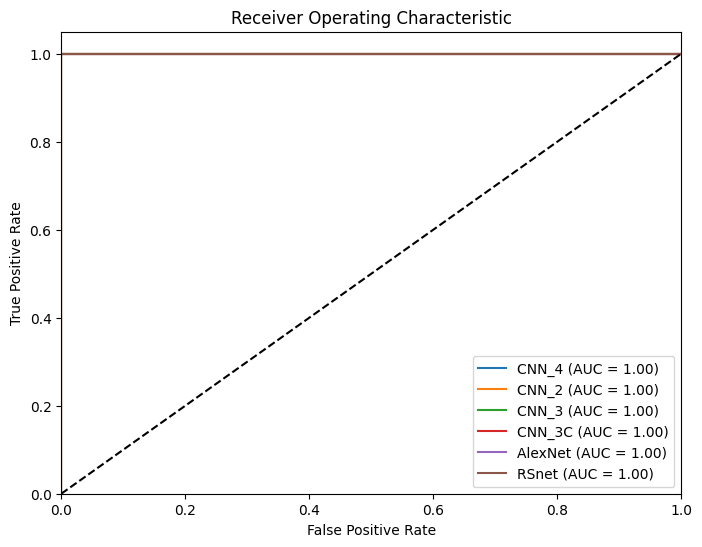


CNN_4:
Best Parameters: {'batch_size': 196, 'dropout_rate': 0.7, 'learning_rate': 0.01}
Mean Cross-Validation Score: 0.9577777743339538
Confusion Matrix:
[[4 0]
 [1 7]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      0.88      0.93         8

    accuracy                           0.92        12
   macro avg       0.90      0.94      0.91        12
weighted avg       0.93      0.92      0.92        12


CNN_2:
Best Parameters: {'batch_size': 196, 'dropout_rate': 0.3, 'learning_rate': 0.01}
Mean Cross-Validation Score: 0.9577777743339538
Confusion Matrix:
[[1 3]
 [0 8]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.25      0.40         4
           1       0.73      1.00      0.84         8

    accuracy                           0.75        12
   macro avg       0.86      0.62      0.62        12
weighted avg   

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.optimizers import Adam
from keras.wrappers.scikit_learn import KerasClassifier

# Define the hyperparameters to tune for each model
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'batch_size': [196,312, 128],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Define the function to create the Keras models
def create_model_1(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu', padding='same'),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_2(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_3(learning_rate=0.001, dropout_rate=0.5):
    model= Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Flatten(),
        Dense(64, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_4(learning_rate=0.001, dropout_rate=0.5):
    model= Sequential([
        Conv1D(32, 3, activation='relu', padding='same', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(2),
        Conv1D(64, 3, activation='relu', padding='same'),
        MaxPooling1D(2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_5(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(96, 11, strides=4, activation='relu',input_shape=(X_train.shape[1],1)),
        MaxPooling1D(3, strides=2),
        Conv1D(256, 5, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Flatten(),
        Dense(4096, activation='relu'),
        Dense(4096, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

def create_model_6(learning_rate=0.001, dropout_rate=0.5):
    model = Sequential([
        Conv1D(96, 11, strides=4, activation='relu',input_shape=(X_train.shape[1],1)),
        MaxPooling1D(3, strides=2),
        Conv1D(256, 5, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(384, 3, padding='same', activation='relu'),
        Conv1D(256, 3, padding='same', activation='relu'),
        MaxPooling1D(3, strides=2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Define the models
models = {
    'CNN_4': (KerasClassifier(build_fn=create_model_1), param_grid),
    'CNN_2': (KerasClassifier(build_fn=create_model_2), param_grid),
    'CNN_3': (KerasClassifier(build_fn=create_model_3), param_grid),
    'CNN_3C': (KerasClassifier(build_fn=create_model_4), param_grid),
    'AlexNet':(KerasClassifier(build_fn=create_model_5), param_grid),
    'RSnet':(KerasClassifier(build_fn=create_model_6), param_grid)
}

# Train and evaluate the models
results = {}
roc_curves = []

for model_name, (model, params) in models.items():
    print(f"Training and evaluating {model_name}...")

    grid_search = GridSearchCV(model, params, cv=3, scoring='accuracy')
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Perform cross-validation
    scores = cross_val_score(best_model, X_train, y_train, cv=5)
    mean_score = np.mean(scores)

    # Get predictions for test set
    y_pred = best_model.predict(X_test)

    # Compute confusion matrix and classification report
    cm = confusion_matrix(y_test, y_pred)
    cr = classification_report(y_test, y_pred)

    results[model_name] = {
        'best_params': best_params,
        'mean_cv_score': mean_score,
        'confusion_matrix': cm,
        'classification_report': cr
    }
    
    print(y_test.shape)

    # Predict the probabilities for ROC curve
    y_proba = best_model.predict_proba(X_test)
    y_proba_positive = y_proba[:, 1]  # Use probabilities for the positive class

    fpr, tpr, _ = roc_curve(y_test, y_proba_positive)
    roc_curves.append((fpr, tpr, model_name))

# Plot the ROC curves
plt.figure(figsize=(8, 6))

for fpr, tpr, model_name in roc_curves:
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Random classifier
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# Print the results
for model_name, result in results.items():
    print(f"\n{model_name}:")
    print("Best Parameters:", result['best_params'])
    print("Mean Cross-Validation Score:", result['mean_cv_score'])
    print("Confusion Matrix:")
    print(result['confusion_matrix'])
    print("Classification Report:")
    print(result['classification_report'])


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 139ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 74ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 108ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 93ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 79ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


1/1 [==============================] - 0s 64ms/step


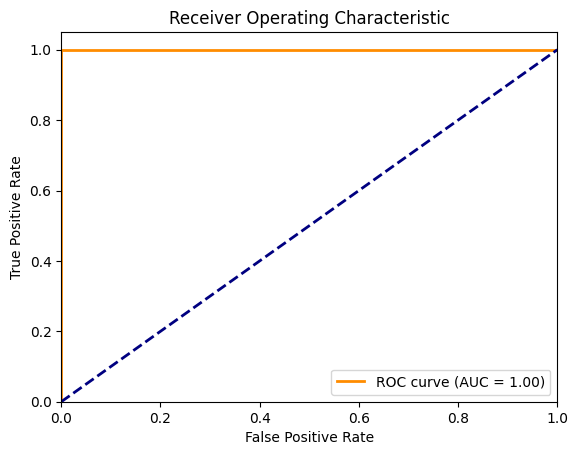

1/1 [==============================] - 0s 18ms/step
Confusion Matrix:
[[ 0  8]
 [ 0 10]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         8
           1       0.56      1.00      0.71        10

    accuracy                           0.56        18
   macro avg       0.28      0.50      0.36        18
weighted avg       0.31      0.56      0.40        18

Cross-Validation Accuracy: 0.9527777777777778


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from scikeras.wrappers import KerasClassifier




# Define the function to create the Keras model
def create_model():
    model = Sequential()
    model.add(Conv1D(196, 3, activation='relu',padding='same', input_shape=(X_train.shape[1], 1)))
    model.add(MaxPooling1D(2))
    model.add(Conv1D(64, 3, activation='relu', padding='same'))
    model.add(MaxPooling1D(2))
    model.add(Flatten())
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    optimizer = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model


# Wrap the Keras model with KerasClassifier
model = KerasClassifier(build_fn=create_model)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')

# Fit the model
model.fit(X_train, y_train)

# Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)

# Extract positive class probabilities for ROC curve
y_prob_positive = y_prob[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict labels for test set
y_pred_test = model.predict(X_test)


# Calculate performance metrics
confusion = confusion_matrix(y_test, y_pred_test)
classification = classification_report(y_test, y_pred_test)

# Print performance metrics
print('Confusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(classification)

# Average test accuracy across all folds
cv_accuracy = np.mean(cv_scores)

print('Cross-Validation Accuracy:', cv_accuracy)


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

def build_model(X_train, y_train):
    # ... existing code ...

    def model_builder(hp):
        model = keras.Sequential()
        model.add(Conv1D(filters=32, kernel_size=3, activation='relu',
                         input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                         input_shape=(X_train.shape[1], 1)))
        model.add(MaxPooling1D(pool_size=2))
        # Tune the number of units in the first Dense layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu',kernel_regularizer=regularizers.l2(0.001)))
        #model.add(keras.layers.Dense(10))
        model.add(Dropout(0.5))
        model.add(Flatten())
        model.add(Dense(1, activation='sigmoid',kernel_regularizer=regularizers.l2(0.001)))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice(
            'learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=hp_learning_rate),loss='binary_crossentropy',metrics=['accuracy'])

        return model

    # ... existing code ...
    tuner = kt.Hyperband(model_builder,objective='accuracy',max_epochs=50,factor=3,overwrite=True)

    tuner.search(X_train, y_train, epochs=50)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
    is {best_hps.get('learning_rate')}.
    """)

    model = tuner.hypermodel.build(best_hps)
    model.summary()
    #Visualize the model
    keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[early_stopping])

    plot_history(history)  # Plot accuracy and loss history

    return model

def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(22, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

Trial 65 Complete [00h 00m 02s]
accuracy: 0.9583333134651184

Best accuracy So Far: 0.9791666865348816
Total elapsed time: 00h 02m 10s
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 96 and the optimal learning rate for the optimizer
    is 0.001.
    
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 98, 32)            128       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 49, 32)           0         
 1D)                                                             
                                                                 
 conv1d_3 (Conv1D)           (None, 47, 64)            6208      
                                                                 
 max_pooling1d_3 (MaxPool

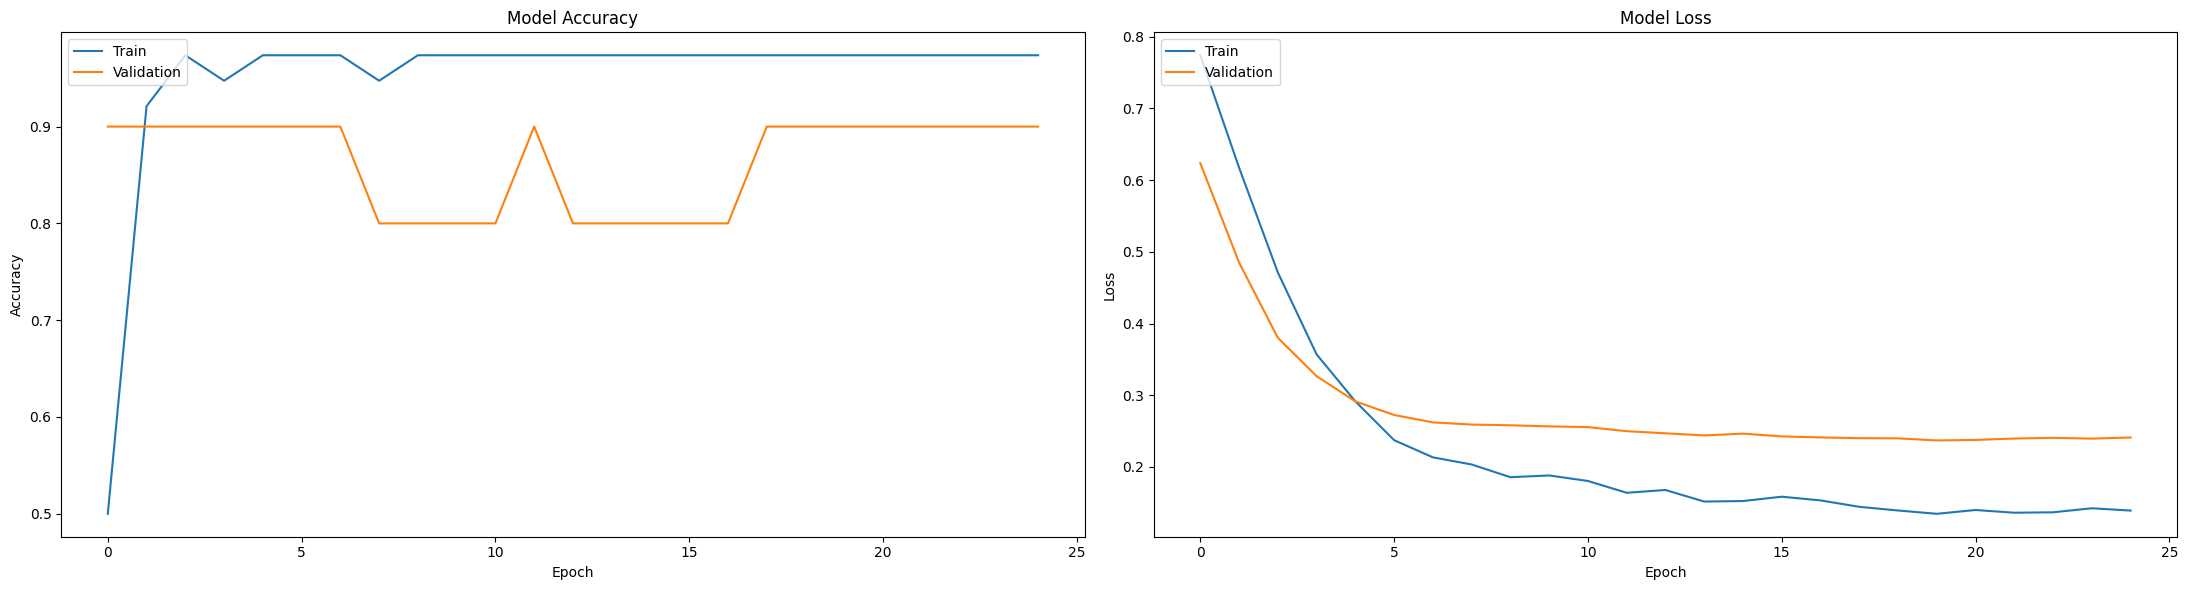

In [22]:
model=build_model(X_train, y_train)

1/1 [==============================] - 0s 129ms/step


<Axes: >

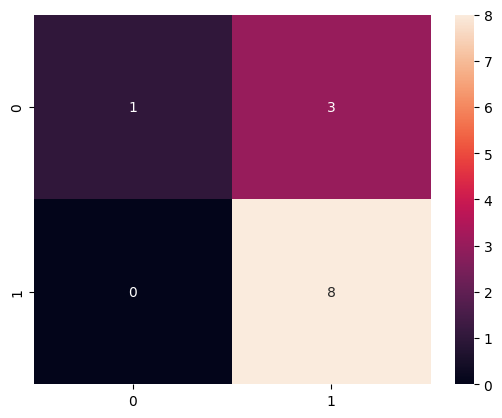

In [23]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

threshold = 0.5  # Adjust the threshold as needed
y_predict_test = model.predict(X_test)
# Apply threshold to convert predicted values to binary
y_binary_predict_test = np.where(y_predict_test > threshold, 1, 0)

cm = confusion_matrix(y_test, y_binary_predict_test)
sns.heatmap(cm, annot=True)

In [24]:
#This is a dump of all my code for Tensorflow. I did not get time to modularize it
#Please mix and match all you need, I'll try my best to document the code
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras
import keras_tuner as kt
from operator import mod
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" disable gpu if you're poor like me :
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
#import csv
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
import tensorflow as tf
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from tensorflow.keras.layers import (Concatenate, Conv1D, Dense, Flatten,
                                     Input, MaxPooling1D, Reshape)
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense, Conv1D, Flatten, LeakyReLU, MaxPool1D, Concatenate, Dropout, BatchNormalization, Softmax, InputLayer
from keras.models import Sequential, Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# First, apply the followind data transformations to the data:
"""

y_train, y_test=to_categorical(y_train), to_categorical(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train_new = tf.keras.preprocessing.sequence.pad_sequences(
    y_train, padding="post")

"""


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a Keras model on the test data and returns evaluation metrics.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.

    Returns:
    - metrics (dict): A dictionary containing evaluation metrics.
    """

    # Compile model
    model.compile(loss=BinaryCrossentropy(),
                  optimizer=RMSprop(), metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, epochs=100)

    # Evaluate model on test data
    y_pred = np.round(model.predict(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return evaluation metrics
    metrics = {'accuracy': accuracy,
               'precision': precision,
               'recall': recall,
               'f1': f1}

    return metrics




def run_experiment(model, trainX, trainy,  testX, testy, repeats, epochs):
    """
    Runs an experiment to evaluate a Keras model on the test data.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.
    - repeats (int): The number of times to repeat the experiment.
    - epochs (int): The number of epochs to train the model.

    Returns:
    - scores (list): A list of evaluation metric scores.
    """

    # Repeat experiment
    scores = []
    for r in range(repeats):
        print(f"Running experiment #{r+1}")
        score = evaluate_model(model, trainX, trainy, testX, testy)
        scores.append(score)

    # Summarize results
    summarize_results(scores)

    return scores

def summarize_results(scores):
    """
    Prints out mean and standard deviation of evaluation metrics.

    Args:
    - scores (list): A list of evaluation metric scores.
    """

    mean_accuracy = np.mean([score['accuracy'] for score in scores])
    std_accuracy = np.std([score['accuracy'] for score in scores])

    mean_precision = np.mean([score['precision'] for score in scores])
    std_precision = np.std([score['precision'] for score in scores])

    mean_recall = np.mean([score['recall'] for score in scores])
    std_recall = np.std([score['recall'] for score in scores])

    mean_f1 = np.mean([score['f1'] for score in scores])
    std_f1 = np.std([score['f1'] for score in scores])

    print(f"Accuracy: {mean_accuracy:.3f} (+/-{std_accuracy:.3f})")
    print(f"Precision: {mean_precision:.3f} (+/-{std_precision:.3f})")
    print(f"Recall: {mean_recall:.3f} (+/-{std_recall:.3f})")
    print(f"F1-score: {mean_f1:.3f} (+/-{std_f1:.3f})")



In [25]:
metrics=evaluate_model(model, X_train, y_train, X_test, y_test)

Epoch 1/100
2/2 [==============================] - 2s 34ms/step - loss: 0.1554 - accuracy: 0.9583
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1725 - accuracy: 0.9375
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1528 - accuracy: 0.9375
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1552 - accuracy: 0.9583
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1494 - accuracy: 0.9375
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1499 - accuracy: 0.9583
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1466 - accuracy: 0.9583
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1455 - accuracy: 0.9583
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1358 - accuracy: 0.9583
Epoch 10/100
2/2 [==============================] - 0s 27ms/step - loss: 0.1434 - accuracy: 0.9583
Epoch 11/100
2/2 [=

In [26]:
 scores=run_experiment(model, X_train, y_train,  X_test, y_test, 1, 100)

Running experiment #1
Epoch 1/100
2/2 [==============================] - 2s 34ms/step - loss: 0.0831 - accuracy: 0.9792
Epoch 2/100
2/2 [==============================] - 0s 36ms/step - loss: 0.0759 - accuracy: 0.9583
Epoch 3/100
2/2 [==============================] - 0s 29ms/step - loss: 0.0613 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0602 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0626 - accuracy: 0.9792
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0744 - accuracy: 0.9583
Epoch 7/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0775 - accuracy: 0.9792
Epoch 8/100
2/2 [==============================] - 0s 32ms/step - loss: 0.0795 - accuracy: 0.9792
Epoch 9/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0775 - accuracy: 0.9583
Epoch 10/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0727 - accuracy: 0.95

In [27]:
summarize_results(scores)

Accuracy: 0.250 (+/-0.000)
Precision: 0.400 (+/-0.000)
Recall: 0.250 (+/-0.000)
F1-score: 0.308 (+/-0.000)


1/1 [==============================] - 0s 22ms/step


<Axes: >

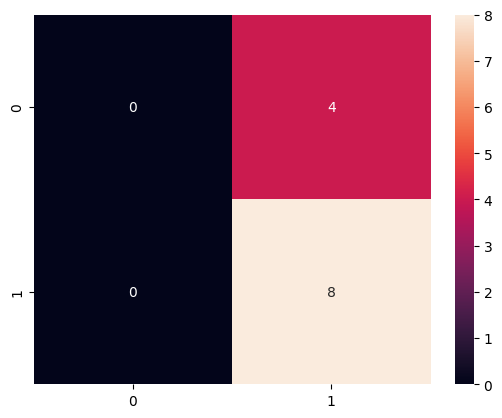

In [29]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

threshold = 0.5  # Adjust the threshold as needed
y_predict_test = model.predict(X_test)
# Apply threshold to convert predicted values to binary
y_binary_predict_test = np.where(y_predict_test > threshold, 1, 0)

cm = confusion_matrix(y_test, y_binary_predict_test)
sns.heatmap(cm, annot=True)

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import all_estimators
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from matplotlib import pyplot


def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a classifier on the given training and test data.

    Args:
        classifier: The classifier instance to evaluate.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(
        roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def evaluate_model_classification(classifier, X_test, y_test, colors=['#F93822', '#FDD20E']
):
    """
    Evaluate a classifier on the given test data and display the confusion matrix and classification report.

    Args:
        classifier: The classifier instance to evaluate.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))


def run_functions_on_models(estimators, function1, function2, X_train, y_train, X_test, y_test):
    """
    Run the given functions on every single classifier instance in scikit-learn.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        function1: The first function to run on each classifier.
        function2: The second function to run on each classifier.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    for name, estimator_class in estimators:
        try:
            estimator = estimator_class()
            print(
                f"Running {function1.__name__} and {function2.__name__} on {name}...")
            estimator.fit(X_train, y_train)
            function1(estimator, X_train, y_train, X_test, y_test)
            function2(estimator, X_test, y_test)
            print("Completed successfully!")
        except Exception as e:
            print(f"Error encountered while fitting {name}: {str(e)}")
            continue


def visualize_best_models(estimators, X_train, y_train):
    """
    Visualize the performances of the best models using violin plots, box plots, and bar plots.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    # Dictionary to store the cross-validation scores of all models
    scores = {}

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Perform cross-validation to evaluate the performance of the classifier
            cv_scores = cross_val_score(
                clf, X_train, y_train, cv=10, scoring='roc_auc')
            # Store the cross-validation scores of the classifier in the dictionary
            scores[name] = cv_scores
        except:
            # Skip any classifiers that raise errors
            pass

    # Select the 5 models with the highest average performance
    best_models = sorted(scores.keys(), key=lambda x: -scores[x].mean())[:5]

    # Create violin plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create box plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create bar plots of the mean performances of the 5 best models
    plt.figure(figsize=(5, 5))
    sns.barplot(x=[f"Model {i+1}" for i in range(5)],
                y=[scores[name].mean() for name in best_models])
    plt.xlabel('Model')
    plt.ylabel('Mean AUC_ROC Scores')
    plt.title('Mean Performances of the Best Models')
    plt.ylim(0.5, 1.0)
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


def plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test):
    """
    Plot the ROC curves for the best models.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Initialize a set to keep track of unique classifiers
    unique_classifiers = set()

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Fit the classifier to the training data
            clf.fit(X_train, y_train)
            # Predict the test data
            y_pred = clf.predict(X_test)
            # Calculate the ROC AUC score
            auc = roc_auc_score(y_test, y_pred)
            if auc > 0.85:
                # Calculate the false positive rate and true positive rate for the ROC curve
                fpr, tpr, _ = roc_curve(y_test, y_pred)
                # Check if the classifier has already been plotted
                if name not in unique_classifiers:
                    # Plot the ROC curve for the classifier
                    plt.plot(fpr, tpr, marker='.',
                             label=f"{name} (AUC = {auc:.2f})")
                    # Add the classifier to the set of unique classifiers
                    unique_classifiers.add(name)
        except:
            # Skip any classifiers that raise errors
            pass

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for the Best Models')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Run the functions on every single classifier instance in the SkLearn library
"""
run_functions_on_models(estimators, model, model_evaluation)
visualize_best_models(estimators, X_train, y_train)
plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)

"""

'\nrun_functions_on_models(estimators, model, model_evaluation)\nvisualize_best_models(estimators, X_train, y_train)\nplot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)\n\n'

In [31]:
from sklearn.utils import all_estimators

# Get a list of all estimator classes
estimator_classes = all_estimators(type_filter='classifier')

# Create a list of (name, estimator_class) tuples
estimators = [(name, EstimatorClass) for name, EstimatorClass in estimator_classes]

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 106, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 384, in _score
    r

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 358, in _score
    y_pred = method_caller(clf, "decision_function", X)
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
AttributeError: 'RadiusNeighborsClassifier' object has no attribute 'decision_function'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 767, in _score
    scores = score

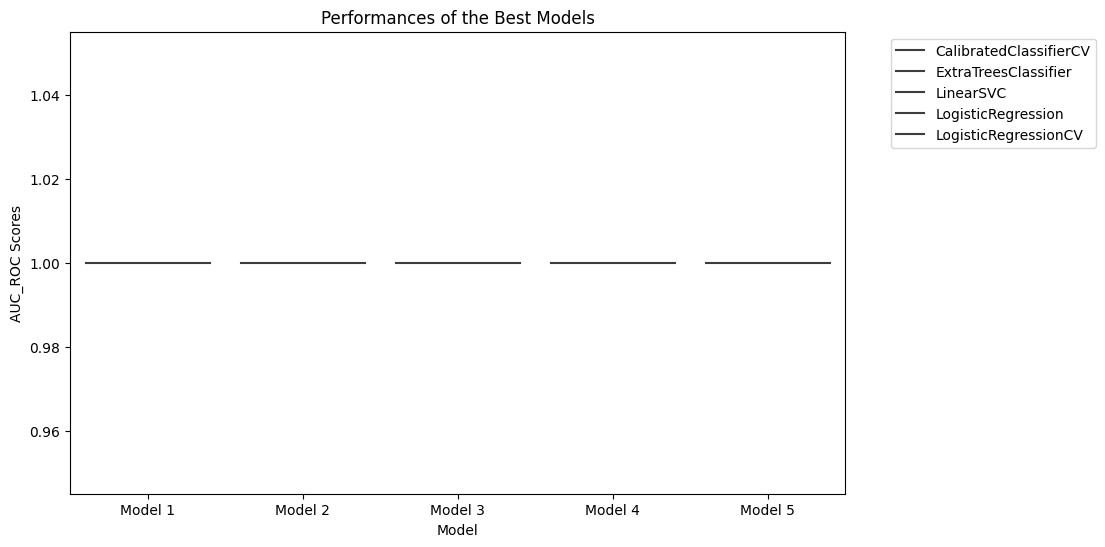

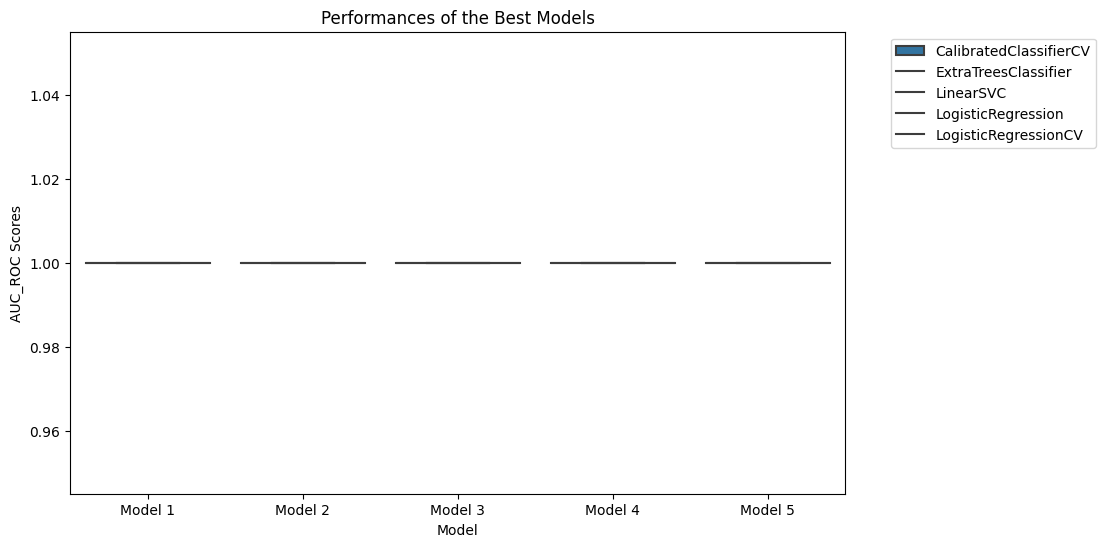

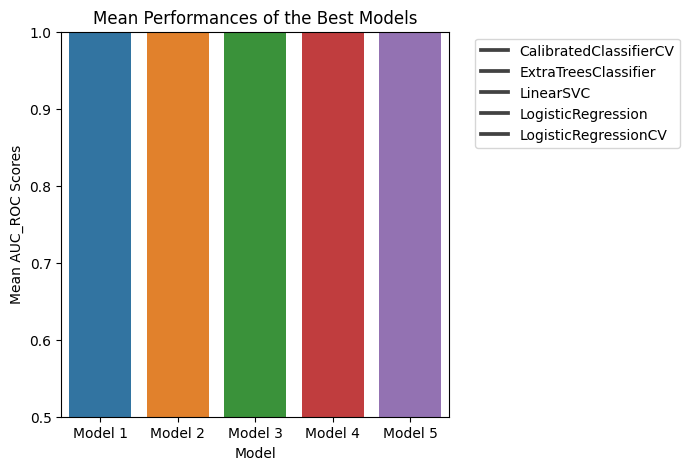

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\semi_supervised\_label_propagation.py:222: RuntimeWarning: invalid value encountered in divide
  probabilities /= normalizer
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\discriminant_analysis.py:887: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is cal

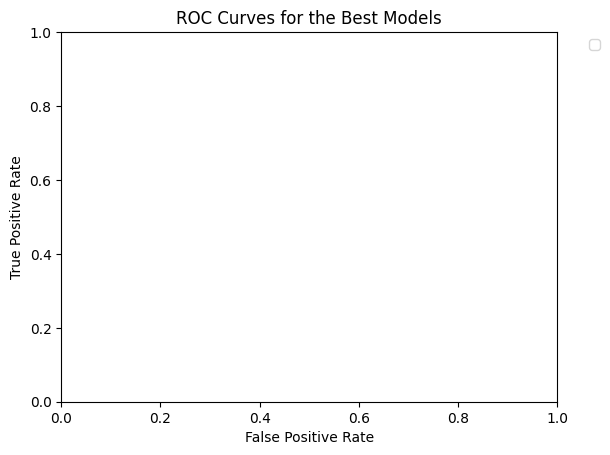

In [33]:
#run_functions_on_models(estimators, model, model_evaluation)
visualize_best_models(estimators, X_train, y_train)
plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)

In [26]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assuming you have your data in X (features) and y (labels/targets)

# Split the data into training and test sets

# Create an instance of the HistGradientBoostingClassifier
model = HistGradientBoostingClassifier()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\experimental\enable_hist_gradient_boosting.py:16: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


Accuracy: 1.0


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.wrappers.scikit_learn import BaseWrapper


     apeh00,1))),
     ('max_pool1d', MaxPooling1D(pool_size=2)),
     ('flatten', Flatten()),
     ('dropout', Dropout(0.7)),
     ('dense', Dense(1, activation='sigmoid'))],
    
    [('conv1d', MyConv1D(filters=32, kernel_size=3, activation='relu',input_size=(100,1))),
     ('max_pool1d', MaxPooling1D(pool_size=2)),
     ('flatten', Flatten()),
     ('dense', Dense(320, activation='relu')),
     ('dropout', Dropout(0.7)),
     ('output', Dense(1, activation='sigmoid'))],
    
    [('conv1d', MyConv1D(filters=128, kernel_size=3, activation='relu')),
     ('max_pool1d', MaxPooling1D(pool_size=2)),
     ('flatten', Flatten()),
     ('dropout', Dropout(0.7)),
     ('dense', Dense(1, activation='sigmoid'))]
]

param_grid = {
    'conv1d__filters': [32, 64, 128],          # Hyperparameters for Conv1D layer
    'conv1d__kernel_size': [3, 5, 7],          # Hyperparameters for Conv1D layer
    'dense__units': [64, 128, 256, 512],       # Hyperparameters for Dense layer         # Hyperparameters for Dropout layer
}

def build_model(architecture, dropout_rate):
    model = Pipeline(architecture)
    return model

best_models = []
for architecture in architectures:
    for dropout_rate in param_grid['dropout__rate']:
        model = build_model(architecture)
        grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
        grid_search.fit(X_train, y_train)
        best_models.append(grid_search.best_estimator_)

plt.figure(figsize=(10, 6))
for model in best_models:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


IndentationError: unexpected indent (398886849.py, line 11)

C:\Users\akhil\AppData\Local\Temp\ipykernel_26676\1770091147.py:57: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=16, verbose=0)


1/1 [==============================] - 0s 78ms/step


1/1 [==============================] - 0s 142ms/step


C:\Users\akhil\AppData\Local\Temp\ipykernel_26676\1770091147.py:57: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=16, verbose=0)


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 81ms/step


1/1 [==============================] - 0s 97ms/step


C:\Users\akhil\AppData\Local\Temp\ipykernel_26676\1770091147.py:57: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=16, verbose=0)


1/1 [==============================] - 0s 140ms/step


1/1 [==============================] - 0s 80ms/step


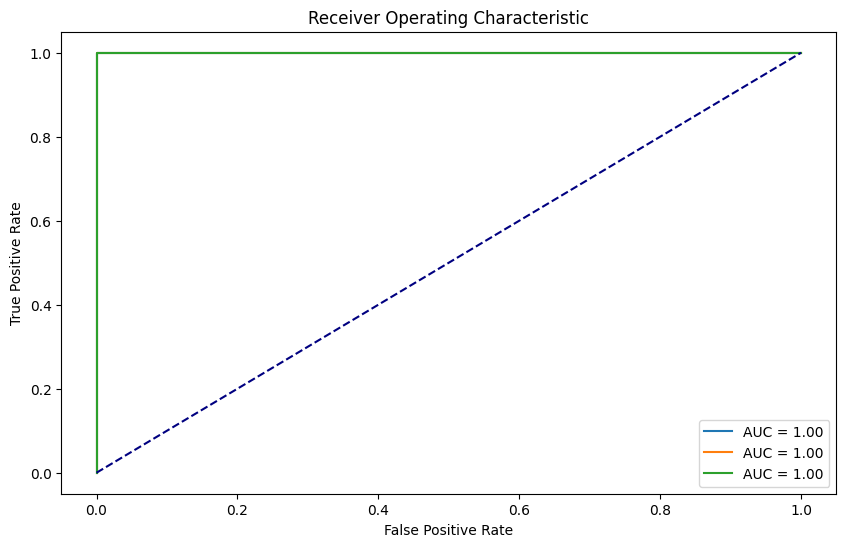

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.pipeline import Pipeline
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dropout, Dense
from keras.wrappers.scikit_learn import KerasClassifier

architectures = [
    [
        Conv1D(filters=32, kernel_size=3, activation='relu',input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ],
    [
        Conv1D(filters=32, kernel_size=3, activation='relu',input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(320, activation='relu'),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ],
    [
        Conv1D(filters=128, kernel_size=3, activation='relu',input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(0.7),
        Dense(1, activation='sigmoid')
    ]
]

param_grid = {
    'filters': [32, 64, 128],          # Hyperparameters for Conv1D layer
    'kernel_size': [3, 5, 7],          # Hyperparameters for Conv1D layer
    'units': [64, 128, 256, 512],       # Hyperparameters for Dense layer
        # Hyperparameters for Dropout layer
}

def build_model(filters, kernel_size, units, dropout_rate):
    model = Sequential([
        Conv1D(filters=filters, kernel_size=kernel_size, activation='relu',input_shape=(100, 1)),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dropout(dropout_rate),
        Dense(units, activation='relu'),
        Dropout(dropout_rate),
        Dense(1, activation='sigmoid')
    ])
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

best_models = []
for architecture in architectures:
    model = KerasClassifier(build_fn=build_model, epochs=10, batch_size=16, verbose=0)
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
    grid_search.fit(X_train, y_train)
    best_models.append(grid_search.best_estimator_)

plt.figure(figsize=(10, 6))
for model in best_models:
    y_score = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_score)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")

plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()



In [14]:
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_pred_test)
sns.heatmap(cm,annot=True)

NameError: name 'y_pred_test' is not defined

C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 24ms/step - loss: 0.7011 - accuracy: 0.6842
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.3304 - accuracy: 0.8684
Epoch 3/10
2/2 [==============================] - 0s 8ms/step - loss: 0.1307 - accuracy: 0.9211
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 1.1068 - accuracy: 0.7895
Epoch 5/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0900 - accuracy: 0.9211
Epoch 6/10
2/2 [==============================] - 0s 9ms/step - loss: 0.0720 - accuracy: 0.9737
Epoch 7/10
2/2 [==============================] - 0s 20ms/step - loss: 0.1372 - accuracy: 0.9474
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0538 - accuracy: 0.9474
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1535 - accuracy: 0.8947
Epoch 10/10
1/1 [==============================] - 0s 214ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 18ms/step - loss: 0.5225 - accuracy: 0.6316
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.7700 - accuracy: 0.8684
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 0.1885 - accuracy: 0.9211
Epoch 4/10
2/2 [==============================] - 0s 14ms/step - loss: 1.4806 - accuracy: 0.9474
Epoch 5/10
2/2 [==============================] - 0s 17ms/step - loss: 0.7209 - accuracy: 0.8947
Epoch 6/10
2/2 [==============================] - 0s 11ms/step - loss: 0.2067 - accuracy: 0.9211
Epoch 7/10
2/2 [==============================] - 0s 16ms/step - loss: 0.2003 - accuracy: 0.9211
Epoch 8/10
2/2 [==============================] - 0s 14ms/step - loss: 0.5198 - accuracy: 0.8947
Epoch 9/10
2/2 [==============================] - 0s 21ms/step - loss: 0.1379 - accuracy: 0.8947
Epoch 10/10
1/1 [==============================] - 0s 221ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 19ms/step - loss: 0.9028 - accuracy: 0.6316
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1407 - accuracy: 0.9474
Epoch 3/10
2/2 [==============================] - 0s 13ms/step - loss: 0.3159 - accuracy: 0.9474
Epoch 4/10
2/2 [==============================] - 0s 11ms/step - loss: 0.2033 - accuracy: 0.9474
Epoch 5/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1190 - accuracy: 0.9737
Epoch 6/10
2/2 [==============================] - 0s 18ms/step - loss: 0.0988 - accuracy: 0.9737
Epoch 7/10
2/2 [==============================] - 0s 8ms/step - loss: 0.0809 - accuracy: 0.9737
Epoch 8/10
2/2 [==============================] - 0s 17ms/step - loss: 0.0786 - accuracy: 0.9737
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1595 - accuracy: 0.9211
Epoch 10/10
1/1 [==============================] - 0s 213ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 19ms/step - loss: 0.6324 - accuracy: 0.6923
Epoch 2/10
2/2 [==============================] - 0s 12ms/step - loss: 0.5898 - accuracy: 0.8718
Epoch 3/10
2/2 [==============================] - 0s 13ms/step - loss: 0.1657 - accuracy: 0.9231
Epoch 4/10
2/2 [==============================] - 0s 15ms/step - loss: 0.2665 - accuracy: 0.8205
Epoch 5/10
2/2 [==============================] - 0s 11ms/step - loss: 0.8614 - accuracy: 0.9231
Epoch 6/10
2/2 [==============================] - 0s 15ms/step - loss: 0.1391 - accuracy: 0.9487
Epoch 7/10
2/2 [==============================] - 0s 15ms/step - loss: 0.1452 - accuracy: 0.8974
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 0.2506 - accuracy: 0.9231
Epoch 9/10
2/2 [==============================] - 0s 9ms/step - loss: 0.1401 - accuracy: 0.9231
Epoch 10/10
1/1 [==============================] - 0s 232ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 29ms/step - loss: 0.6540 - accuracy: 0.7179
Epoch 2/10
2/2 [==============================] - 0s 15ms/step - loss: 0.2762 - accuracy: 0.9231
Epoch 3/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0783 - accuracy: 0.9231
Epoch 4/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0265 - accuracy: 0.9744
Epoch 5/10
2/2 [==============================] - 0s 9ms/step - loss: 0.3276 - accuracy: 0.9744
Epoch 6/10
2/2 [==============================] - 0s 8ms/step - loss: 0.7678 - accuracy: 0.9744
Epoch 7/10
2/2 [==============================] - 0s 11ms/step - loss: 0.2417 - accuracy: 0.9231
Epoch 8/10
2/2 [==============================] - 0s 11ms/step - loss: 0.0992 - accuracy: 0.9487
Epoch 9/10
2/2 [==============================] - 0s 14ms/step - loss: 0.0490 - accuracy: 1.0000
Epoch 10/10
1/1 [==============================] - 0s 206ms/step


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\scikeras\wrappers.py:301: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


Epoch 1/10
2/2 [==============================] - 1s 32ms/step - loss: 0.5489 - accuracy: 0.4792
Epoch 2/10
2/2 [==============================] - 0s 25ms/step - loss: 0.2317 - accuracy: 0.9375
Epoch 3/10
2/2 [==============================] - 0s 17ms/step - loss: 1.0109 - accuracy: 0.9583
Epoch 4/10
2/2 [==============================] - 0s 24ms/step - loss: 0.7684 - accuracy: 0.9167
Epoch 5/10
2/2 [==============================] - 0s 24ms/step - loss: 0.3659 - accuracy: 0.8958
Epoch 6/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1697 - accuracy: 0.8958
Epoch 7/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1671 - accuracy: 0.9583
Epoch 8/10
2/2 [==============================] - 0s 25ms/step - loss: 0.1084 - accuracy: 0.9375
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 0.1386 - accuracy: 0.8958
Epoch 10/10
1/1 [==============================] - 0s 48ms/step


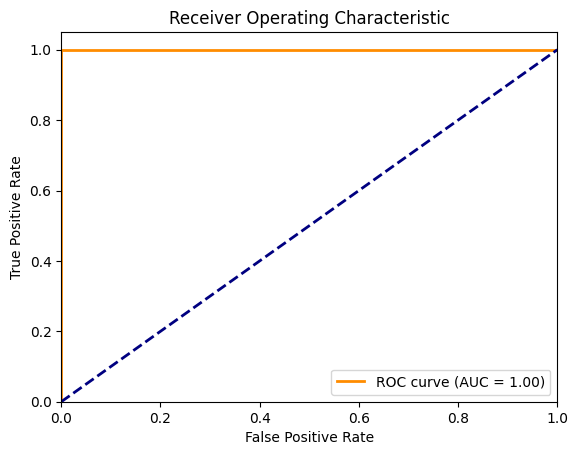

1/1 [==============================] - 0s 49ms/step
Confusion Matrix:
[[0 4]
 [0 8]]

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12

Cross-Validation Accuracy: 0.9377777777777776
mean accuracy on 5 fold: 0.6666666666666666


C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [14]:
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras.optimizers import legacy
from keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from scikeras.wrappers import KerasClassifier
from sklearn.preprocessing import StandardScaler




# Define the function to create the Keras model
def create_model():
    model = Sequential()
    model.add(Conv1D(256, 2, activation='relu', input_shape=(100, 1)))
    model.add(MaxPooling1D(2))
    #model.add(Conv1D(416, 2, activation='relu'))
    #model.add(MaxPooling1D(2))
    
    model.add(Dense(320, activation='relu'))
    model.add(Flatten())
    model.add(Dense(10))
    
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))
    optimizer=Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Wrap the Keras model with KerasClassifier



model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=28)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
model.fit(X_train, y_train)
y_predict_test=model.predict(X_test)
# Evaluate the model
score = model.score(X_test, y_test)
#print('Test loss:', score[0])
#print('Test accuracy:', score[1])

# Average test accuracy across all folds
cv_accuracy = np.mean(cv_scores)



y_prob = model.predict_proba(X_test)
y_prob_positive = y_prob[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob_positive)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Predict labels for test set
y_pred_test = model.predict(X_test)


# Calculate performance metrics
confusion = confusion_matrix(y_test, y_pred_test)
classification = classification_report(y_test, y_pred_test)

# Print performance metrics
print('Confusion Matrix:')
print(confusion)
print('\nClassification Report:')
print(classification)

print('Cross-Validation Accuracy:', cv_accuracy)
print('mean accuracy on 5 fold:', score)


1/1 [==============================] - 0s 49ms/step


<Axes: >

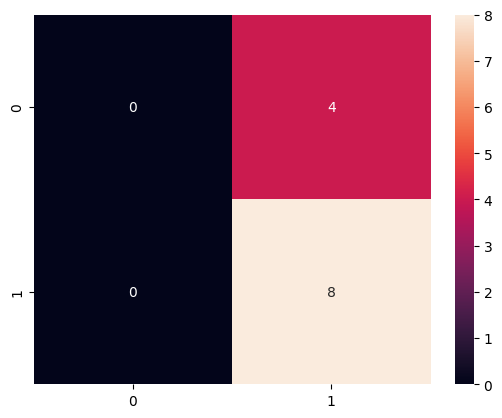

In [15]:
from sklearn.metrics import confusion_matrix,classification_report
y_predict_test = model.predict(X_test)
cm=confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm,annot=True)

In [50]:
def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [52]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, callbacks=[early_stopping])

plot_history(history)

NameError: name 'X_val' is not defined

In [49]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier


# Define the function to create the Keras model
def create_model(optimizer=Adam(learning_rate=0.001), dropout_rate=0.5):
    model = Sequential()
    model.add(Conv1D(256, 3, activation='relu', input_shape=(100, 1)))
    model.add(MaxPooling1D(2))
    #model.add(Conv1D(128, 3, activation='relu'))
    #model.add(MaxPooling1D(2))
    
    model.add(Dense(320, activation='relu'))
    model.add(Flatten())
    model.add(keras.layers.Dense(10))
    
    model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create the Keras classifier
model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=28)

# Define the hyperparameters and their search space
hyperparameters = {
    'optimizer': [Adam(learning_rate=0.001), Adam(learning_rate=0.01)],
    'dropout_rate': [0.3, 0.5, 0.7]
}

# Perform grid search
grid = GridSearchCV(estimator=model, param_grid=hyperparameters, cv=5, scoring='accuracy')
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding accuracy
print("Best Accuracy: {:.2f}%".format(grid_result.best_score_ * 100))
print("Best Hyperparameters:", grid_result.best_params_)


C:\Users\akhil\AppData\Local\Temp\ipykernel_33448\372044475.py:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=28)


Epoch 1/10
2/2 [==============================] - 2s 23ms/step - loss: 0.9656 - accuracy: 0.6579
Epoch 2/10
2/2 [==============================] - 0s 16ms/step - loss: 0.4266 - accuracy: 0.7368
Epoch 3/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1144 - accuracy: 0.9211
Epoch 4/10
2/2 [==============================] - 0s 13ms/step - loss: 0.1188 - accuracy: 0.9474
Epoch 5/10
2/2 [==============================] - 0s 23ms/step - loss: 0.4728 - accuracy: 0.9474
Epoch 6/10
2/2 [==============================] - 0s 16ms/step - loss: 0.5048 - accuracy: 0.9474
Epoch 7/10
2/2 [==============================] - 0s 14ms/step - loss: 0.4125 - accuracy: 0.9737
Epoch 8/10
2/2 [==============================] - 0s 18ms/step - loss: 0.4871 - accuracy: 0.9474
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 0.5108 - accuracy: 0.9474
Epoch 10/10
1/1 [==============================] - 0s 199ms/step
Epoch 1/10
2/2 [==============================] - 2s 16ms/step

2/2 [==============================] - 2s 31ms/step - loss: 4.1702 - accuracy: 0.4615
Epoch 2/10
2/2 [==============================] - 0s 13ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 3/10
2/2 [==============================] - 0s 18ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 4/10
2/2 [==============================] - 0s 25ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 5/10
2/2 [==============================] - 0s 15ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 6/10
2/2 [==============================] - 0s 13ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 8/10
2/2 [==============================] - 0s 20ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 9/10
2/2 [==============================] - 0s 19ms/step - loss: 8.2111 - accuracy: 0.4615
Epoch 10/10
1/1 [==============================] - 0s 216ms/step
Epoch 1/10
2/2 [==============================] - 2s 16ms/step - loss: 6.

2/2 [==============================] - 2s 22ms/step - loss: 3.6280 - accuracy: 0.5897
Epoch 2/10
2/2 [==============================] - 0s 20ms/step - loss: 0.1502 - accuracy: 0.9231
Epoch 3/10
2/2 [==============================] - 0s 23ms/step - loss: 0.1182 - accuracy: 0.9487
Epoch 4/10
2/2 [==============================] - 0s 12ms/step - loss: 0.0408 - accuracy: 0.9744
Epoch 5/10
2/2 [==============================] - 0s 16ms/step - loss: 0.0535 - accuracy: 0.9487
Epoch 6/10
2/2 [==============================] - 0s 17ms/step - loss: 0.1680 - accuracy: 0.9487
Epoch 7/10
2/2 [==============================] - 0s 24ms/step - loss: 0.2846 - accuracy: 0.9231
Epoch 8/10
2/2 [==============================] - 0s 16ms/step - loss: 0.1460 - accuracy: 0.9487
Epoch 9/10
2/2 [==============================] - 0s 16ms/step - loss: 0.2203 - accuracy: 0.9744
Epoch 10/10
1/1 [==============================] - 0s 297ms/step
Epoch 1/10
2/2 [==============================] - 2s 16ms/step - loss: 4.

In [47]:
#This is a dump of all my code for Tensorflow. I did not get time to modularize it
#Please mix and match all you need, I'll try my best to document the code
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
import tensorflow.keras as keras
import keras_tuner as kt
from operator import mod
import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1" disable gpu if you're poor like me :
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
#import csv
from sklearn.decomposition import PCA
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import keras
import tensorflow as tf
from keras.utils import to_categorical
from matplotlib import pyplot
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.utils import to_categorical
from tensorflow.keras.layers import (Concatenate, Conv1D, Dense, Flatten,
                                     Input, MaxPooling1D, Reshape)
from tensorflow.keras.models import Model
from keras.utils.vis_utils import plot_model
from keras.layers import Input, Dense, Conv1D, Flatten, LeakyReLU, MaxPool1D, Concatenate, Dropout, BatchNormalization, Softmax, InputLayer
from keras.models import Sequential, Model
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Dropout, MaxPooling1D, Flatten
from tensorflow.keras.losses import BinaryCrossentropy
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# First, apply the followind data transformations to the data:
"""

y_train, y_test=to_categorical(y_train), to_categorical(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
y_train_new = tf.keras.preprocessing.sequence.pad_sequences(
    y_train, padding="post")

"""


def evaluate_model(model, X_train, y_train, X_test, y_test):
    """
    Evaluates a Keras model on the test data and returns evaluation metrics.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.

    Returns:
    - metrics (dict): A dictionary containing evaluation metrics.
    """

    # Compile model
    optimizer = Adam(learning_rate=0.001)
    
    model.compile(loss=BinaryCrossentropy(),optimizer=optimizer, metrics=['accuracy'])

    # Train model
    model.fit(X_train, y_train, epochs=100)

    # Evaluate model on test data
    y_pred = np.round(model.predict(X_test))
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Return evaluation metrics
    metrics = {'accuracy': accuracy,
               'precision': precision,
               'recall': recall,
               'f1': f1}

    return metrics




def run_experiment(model, trainX, trainy,  testX, testy, repeats, epochs):
    """
    Runs an experiment to evaluate a Keras model on the test data.

    Args:
    - model (tensorflow.keras.models.Sequential): The Keras model to be evaluated.
    - trainX (numpy.ndarray): The training data.
    - trainy (numpy.ndarray): The training labels.
    - testX (numpy.ndarray): The test data.
    - testy (numpy.ndarray): The test labels.
    - repeats (int): The number of times to repeat the experiment.
    - epochs (int): The number of epochs to train the model.

    Returns:
    - scores (list): A list of evaluation metric scores.
    """

    # Repeat experiment
    scores = []
    for r in range(repeats):
        print(f"Running experiment #{r+1}")
        score = evaluate_model(model, trainX, trainy, testX, testy)
        scores.append(score)

    # Summarize results
    summarize_results(scores)

    return scores

def summarize_results(scores):
    """
    Prints out mean and standard deviation of evaluation metrics.

    Args:
    - scores (list): A list of evaluation metric scores.
    """

    mean_accuracy = np.mean([score['accuracy'] for score in scores])
    std_accuracy = np.std([score['accuracy'] for score in scores])

    mean_precision = np.mean([score['precision'] for score in scores])
    std_precision = np.std([score['precision'] for score in scores])

    mean_recall = np.mean([score['recall'] for score in scores])
    std_recall = np.std([score['recall'] for score in scores])

    mean_f1 = np.mean([score['f1'] for score in scores])
    std_f1 = np.std([score['f1'] for score in scores])

    print(f"Accuracy: {mean_accuracy:.3f} (+/-{std_accuracy:.3f})")
    print(f"Precision: {mean_precision:.3f} (+/-{std_precision:.3f})")
    print(f"Recall: {mean_recall:.3f} (+/-{std_recall:.3f})")
    print(f"F1-score: {mean_f1:.3f} (+/-{std_f1:.3f})")



In [48]:
metrics=evaluate_model(model, X_train, y2_train, X_test, y2_test)

AttributeError: 'KerasClassifier' object has no attribute 'compile'

In [24]:
def build_model(X_train, y_train):
    
    def create_model():
        model = Sequential()
        model.add(Conv1D(256, 2, activation='relu', input_shape=(100, 1)))
        model.add(MaxPooling1D(2))
        model.add(Conv1D(416, 2, activation='relu'))
        model.add(MaxPooling1D(2))

        model.add(Dense(320, activation='relu'))
        model.add(Flatten())
        model.add(keras.layers.Dense(10,activation='relu'))

        model.add(Dropout(0.3))
        model.add(Dense(1, activation='sigmoid'))
        optimizer=Adam(learning_rate=0.01)
        model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    # Wrap the Keras model with KerasClassifie
        model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=28) 
        early_stopping = EarlyStopping(monitor='val_loss', patience=5)
        history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, callbacks=[early_stopping])

        plot_history(history)  # Plot accuracy and loss history

        return model
     
    

# Print the model summary
    

    #model.summary()
    #Visualize the model
    keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, callbacks=[early_stopping])

    plot_history(history)  # Plot accuracy and loss history

    return model

def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

In [25]:
model=build_model(X_train,y_train)

AttributeError: 'KerasClassifier' object has no attribute 'built'

In [21]:
y_predict_test=model.predict(X_test)
y_predict_test = model.predict(X_test)
y_pred_binary = (y_predict_test >= 0.5).astype(int)
print(classification_report(y_test, y_pred_binary))



1/1 [==============================] - 0s 38ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.67      1.00      0.80         8

    accuracy                           0.67        12
   macro avg       0.33      0.50      0.40        12
weighted avg       0.44      0.67      0.53        12



C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\akhil\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import Adam
from tensorflow.keras.layers import (Conv1D, Dense, Dropout, Flatten,MaxPooling1D, Reshape)
from tensorflow.keras.models import Sequential
import keras_tuner as kt
from keras.callbacks import EarlyStopping


def build_model(X_train, y_train):
    """
    Build and compile the model using hyperparameters found through hyperparameter tuning.

    This function performs hyperparameter tuning using Keras Tuner to find the optimal
    hyperparameters for the model. It creates a model with a specified architecture and
    compiles it with the best hyperparameters. The hyperparameter search space includes
    the number of units in the first dense layer and the learning rate for the optimizer.

    Args:
        X_train (numpy.ndarray): Input training data.
        y_train (numpy.ndarray): Target training data.

    Returns:
        keras.models.Sequential: Compiled model with the optimal hyperparameters.
    """
    def model_builder(hp):
        model = keras.Sequential()
        model.add(Conv1D(filters=64, kernel_size=3, activation='relu',
                         input_shape=(X_train.shape[1], 1)))

        # Tune the number of units in the first Dense layer
        hp_units = hp.Int('units', min_value=32, max_value=512, step=32)
        model.add(keras.layers.Dense(units=hp_units, activation='relu'))
        model.add(keras.layers.Dense(10))
        model.add(MaxPooling1D(pool_size=2))
        model.add(Flatten())
        model.add(Dense(1, activation='tanh'))

        # Tune the learning rate for the optimizer
        hp_learning_rate = hp.Choice(
            'learning_rate', values=[1e-2, 1e-3, 1e-4])

        model.compile(optimizer=keras.optimizers.Adam(learning_rate=hp_learning_rate),
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

        return model

    tuner = kt.Hyperband(model_builder,
                         objective='accuracy',
                         max_epochs=50,
                         factor=3,
                         overwrite=True)

    tuner.search(X_train, y_train, epochs=50)

    best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

    print(f"""
    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
    is {best_hps.get('learning_rate')}.
    """)

    model = tuner.hypermodel.build(best_hps)
    model.summary()
    #Visualize the model
    keras.utils.plot_model(model, show_shapes=True,show_layer_activations=True)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
    # Fit the model with early stopping
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),epochs=100, callbacks=[early_stopping])

    plot_history(history)  # Plot accuracy and loss history

    return model
   
def plot_history(history):
    """
    Plot the accuracy and loss history of a trained model.

    This function takes the training history of a model and creates two plots: one for the
    accuracy and one for the loss. The plots show the training and validation performance
    over the epochs.

    Args:
        history (keras.callbacks.History): Training history of the model.
    """
    plt.figure(figsize=(12, 6))

    # Plot accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.tight_layout()
    plt.show()

Trial 63 Complete [00h 00m 03s]
accuracy: 0.5416666865348816

Best accuracy So Far: 0.9791666865348816
Total elapsed time: 00h 03m 27s
INFO:tensorflow:Oracle triggered exit

    The hyperparameter search is complete. The optimal number of units in the first densely-connected
    layer is 416 and the optimal learning rate for the optimizer
    is 0.01.
    
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_1 (Conv1D)           (None, 98, 64)            256       
                                                                 
 dense_3 (Dense)             (None, 98, 416)           27040     
                                                                 
 dense_4 (Dense)             (None, 98, 10)            4170      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 49, 10)           0         
 1D)                     

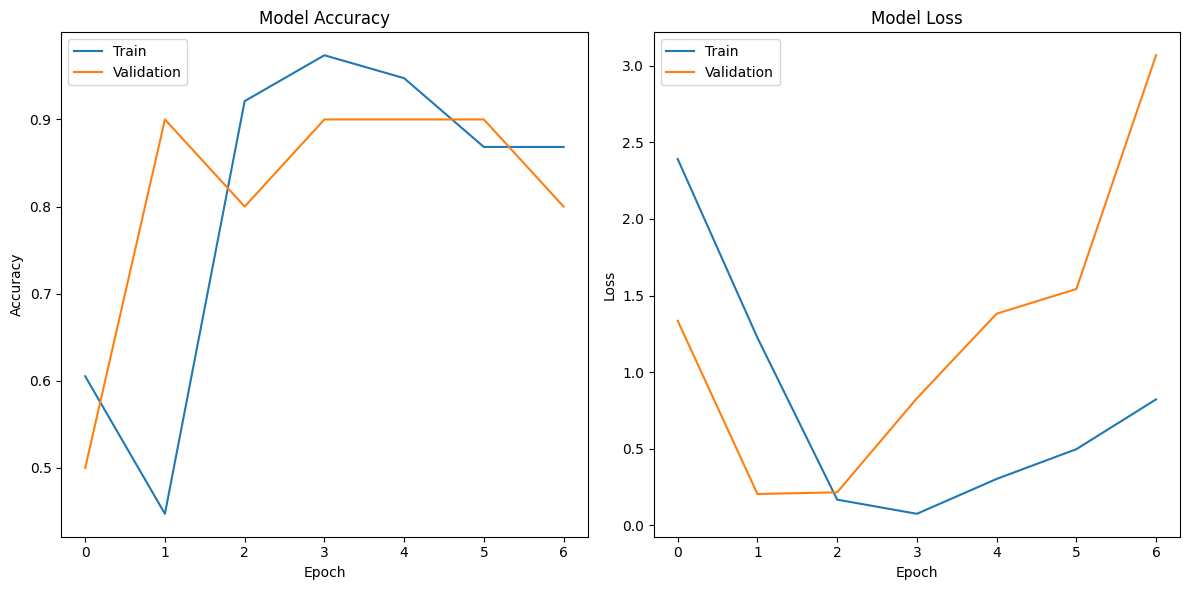

In [11]:
model=build_model(X_train, y2_train)

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.utils import all_estimators
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, plot_roc_curve
from matplotlib import pyplot


def evaluate_model(classifier, X_train, y_train, X_test, y_test):
    """
    Train and evaluate a classifier on the given training and test data.

    Args:
        classifier: The classifier instance to evaluate.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    classifier.fit(X_train, y_train)
    prediction = classifier.predict(X_test)
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    print("Accuracy:", '{0:.2%}'.format(accuracy_score(y_test, prediction)))
    print("Cross Validation Score:", '{0:.2%}'.format(cross_val_score(
        classifier, X_train, y_train, cv=cv, scoring='roc_auc').mean()))
    print("ROC_AUC Score:", '{0:.2%}'.format(
        roc_auc_score(y_test, prediction)))
    plot_roc_curve(classifier, X_test, y_test)
    plt.title('ROC_AUC_Plot')
    plt.show()


def evaluate_model_classification(classifier, X_test, y_test, colors=['#F93822', '#FDD20E']
):
    """
    Evaluate a classifier on the given test data and display the confusion matrix and classification report.

    Args:
        classifier: The classifier instance to evaluate.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Confusion Matrix
    cm = confusion_matrix(y_test, classifier.predict(X_test))
    names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    counts = [value for value in cm.flatten()]
    percentages = ['{0:.2%}'.format(value)
                   for value in cm.flatten() / np.sum(cm)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2,
              v3 in zip(names, counts, percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cm, annot=labels, cmap=colors, fmt='')

    # Classification Report
    print(classification_report(y_test, classifier.predict(X_test)))


def run_functions_on_models(estimators, function1, function2, X_train, y_train, X_test, y_test):
    """
    Run the given functions on every single classifier instance in scikit-learn.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        function1: The first function to run on each classifier.
        function2: The second function to run on each classifier.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    for name, estimator_class in estimators:
        try:
            estimator = estimator_class()
            print(
                f"Running {function1.__name__} and {function2.__name__} on {name}...")
            estimator.fit(X_train, y_train)
            function1(estimator, X_train, y_train, X_test, y_test)
            function2(estimator, X_test, y_test)
            print("Completed successfully!")
        except Exception as e:
            print(f"Error encountered while fitting {name}: {str(e)}")
            continue


def visualize_best_models(estimators, X_train, y_train):
    """
    Visualize the performances of the best models using violin plots, box plots, and bar plots.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    # Dictionary to store the cross-validation scores of all models
    scores = {}

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Perform cross-validation to evaluate the performance of the classifier
            cv_scores = cross_val_score(
                clf, X_train, y_train, cv=10, scoring='roc_auc')
            # Store the cross-validation scores of the classifier in the dictionary
            scores[name] = cv_scores
        except:
            # Skip any classifiers that raise errors
            pass

    # Select the 5 models with the highest average performance
    best_models = sorted(scores.keys(), key=lambda x: -scores[x].mean())[:5]

    # Create violin plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.violinplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create box plots of the performances of the 5 best models
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=[scores[name] for name in best_models])
    plt.xticks(ticks=range(5), labels=[f"Model {i+1}" for i in range(5)])
    plt.xlabel('Model')
    plt.ylabel('AUC_ROC Scores')
    plt.title('Performances of the Best Models')
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

    # Create bar plots of the mean performances of the 5 best models
    plt.figure(figsize=(5, 5))
    sns.barplot(x=[f"Model {i+1}" for i in range(5)],
                y=[scores[name].mean() for name in best_models])
    plt.xlabel('Model')
    plt.ylabel('Mean AUC_ROC Scores')
    plt.title('Mean Performances of the Best Models')
    plt.ylim(0.5, 1.0)
    plt.legend(best_models, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


def plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test):
    """
    Plot the ROC curves for the best models.

    Args:
        estimators: List of (name, estimator_class) tuples representing the available classifiers.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.
        X_test (array-like): Test data matrix of shape (n_samples, n_features).
        y_test (array-like): Target values for the test data.

    Returns:
        None
    """
    # Initialize a set to keep track of unique classifiers
    unique_classifiers = set()

    # Iterate through the list of estimator classes
    for name, ClassifierClass in estimators:
        try:
            # Initialize the classifier
            clf = ClassifierClass()
            # Fit the classifier to the training data
            clf.fit(X_train, y_train)
            # Predict the test data
            y_pred = clf.predict(X_test)
            # Calculate the ROC AUC score
            auc = roc_auc_score(y_test, y_pred)
            if auc > 0.85:
                # Calculate the false positive rate and true positive rate for the ROC curve
                fpr, tpr, _ = roc_curve(y_test, y_pred)
                # Check if the classifier has already been plotted
                if name not in unique_classifiers:
                    # Plot the ROC curve for the classifier
                    plt.plot(fpr, tpr, marker='.',
                             label=f"{name} (AUC = {auc:.2f})")
                    # Add the classifier to the set of unique classifiers
                    unique_classifiers.add(name)
        except:
            # Skip any classifiers that raise errors
            pass

    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for the Best Models')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


# Run the functions on every single classifier instance in the SkLearn library
"""
run_functions_on_models(estimators, model, model_evaluation)
visualize_best_models(estimators, X_train, y_train)
plot_roc_curves_best_models(estimators, X_train, y_train, X_test, y_test)


In [ ]:
import numpy as np
from scipy.stats import pearsonr
from sklearn.model_selection import KFold, LeaveOneOut, cross_val_score
from matplotlib import pyplot as plt


def evaluate_model(cv, model, X, y):
    """
    Evaluate the performance of a model using cross-validation.

    Args:
        cv: Cross-validation strategy object.
        model: Model object to evaluate.
        X (array-like): Input data matrix of shape (n_samples, n_features).
        y (array-like): Target values of shape (n_samples,).

    Returns:
        mean_score: Mean cross-validation score.
    """
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    mean_score = np.mean(scores)
    return mean_score


def sensitivity_analysis(model_list, X_train, y_train):
    """
    Perform a sensitivity analysis of the number of folds used in K-fold cross-validation.

    Args:
        model_list: List of models to analyze.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    r_max = X_train.shape[1]
    folds = range(2, r_max)
    means, mins, maxs = [], [], []

    for model in model_list:
        ideal, _, _ = evaluate_model(LeaveOneOut(), model, X_train, y_train)
        print(type(model).__name__)
        print('Ideal: %.3f' % ideal)

        for k in folds:
            cv = KFold(n_splits=k, shuffle=True, random_state=1)
            k_mean = evaluate_model(cv, model, X_train, y_train)
            k_min = k_mean - np.min(k_mean)
            k_max = np.max(k_mean) - k_mean
            print('> folds=%d, accuracy=%.3f (%.3f, %.3f)' %
                  (k, k_mean, k_min, k_max))
            means.append(k_mean)
            mins.append(k_min)
            maxs.append(k_max)

        plt.errorbar(folds, means, yerr=[mins, maxs], fmt='o')
        plt.plot(folds, [ideal for _ in range(len(folds))], color='r')
        plt.xlabel('Number of Folds')
        plt.ylabel('Accuracy')
        plt.title('Sensitivity Analysis of K-Fold Cross-Validation')
        plt.show()


def pearson_correlation_analysis(model_list, X_train, y_train):
    """
    Perform Pearson correlation analysis between ideal cross-validation and K-fold cross-validation.

    Args:
        model_list: List of models to analyze.
        X_train (array-like): Training data matrix of shape (n_samples, n_features).
        y_train (array-like): Target values for the training data.

    Returns:
        None
    """
    ideal_cv = LeaveOneOut()
    cv = KFold(n_splits=10, shuffle=True, random_state=1)
    ideal_results, cv_results = [], []

    for model in model_list:
        cv_mean = evaluate_model(cv, model, X_train, y_train)
        ideal_mean = evaluate_model(ideal_cv, model, X_train, y_train)

        if np.isnan(cv_mean) or np.isnan(ideal_mean):
            continue

        cv_results.append(cv_mean)
        ideal_results.append(ideal_mean)

        print('>%s: ideal=%.3f, cv=%.3f' %
              (type(model).__name__, ideal_mean, cv_mean))

    corr, _ = pearsonr(cv_results, ideal_results)
    print('Correlation: %.3f' % corr)

    plt.scatter(cv_results, ideal_results)
    coeff, bias = np.polyfit(cv_results, ideal_results, 1)
    line = coeff * np.asarray(cv_results) + bias
    plt.plot(cv_results, line, color='r')
    plt.xlabel('K-Fold Cross-Validation Accuracy')
    plt.ylabel('Ideal Cross-Validation Accuracy')
    plt.title('Pearson Correlation Analysis')
    plt.show()

#Example usage
"""
sensitivity_analysis(model_list, X_train, y_train)
pearson_correlation_analysis(model_list, X_train, y_train)

"""

In [13]:
sensitivity_analysis(model_list, X_train, y_train)
pearson_correlation_analysis(model_list, X_train, y_train)

NameError: name 'score' is not defined

In [ ]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Dense, Flatten, Dropout, Activation
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from keras import regularizers


# Load the data
# Assuming you have loaded X_train, y_train, X_test, y_test

# Data Preprocessing


# Define the model
model = Sequential()
model.add(Conv1D(256, 3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(128, 3, activation='relu'))
model.add(MaxPooling1D(2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='tanh'))

# Compile the model
optimizer = Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Perform cross-validation
cv = StratifiedKFold(n_splits=5)
cv_scores = []
for train_index, val_index in cv.split(X_train, y_train):
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

    # Train the model on the current fold
    early_stopping = EarlyStopping(monitor='val_loss', patience=5)
    model.fit(X_train_fold, y_train_fold, epochs=10, batch_size=32, validation_data=(X_val_fold, y_val_fold), callbacks=[early_stopping])

    # Evaluate the model on the validation fold
    accuracy = model.evaluate(X_val_fold, y_val_fold, verbose=0)
    cv_scores.append(accuracy)

# Train the model on the full training set
model.fit(X_train, y_train, epochs=10, batch_size=28)

# Evaluate the model on the test set
test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print('Test accuracy:', test_accuracy)
print('Cross-Validation Accuracy:', np.mean(cv_scores))



In [ ]:
import numpy as np

def low_level_data_fusion(X_train_raman, X_train_ftir, X_test_raman, X_test_ftir):
    # Calculate the variance of the data from each source.
    X_train_raman = np.array(X_train_raman, dtype=float)
    X_train_ftir = np.array(X_train_ftir, dtype=float)
    X_test_raman = np.array(X_test_raman, dtype=float)
    X_test_ftir = np.array(X_test_ftir, dtype=float)
    
    
    var_raman = np.var(X_train_raman, axis=0)
    var_ftir = np.var(X_train_ftir, axis=0)

    # Align the shapes of var_raman and var_ftir for addition.
   
    var_raman = var_raman.reshape(1, -1)
  
    var_ftir = var_ftir.reshape((1, 264))

    # Calculate the weights for each feature.
    weights_raman = var_ftir / (var_raman + var_ftir)
    weights_ftir = var_raman / (var_raman + var_ftir)

    # Calculate the weighted average for each sample.
    X_train = np.multiply(X_train_raman, weights_raman) + np.multiply(X_train_ftir, weights_ftir)
    X_test = np.multiply(X_test_raman, weights_raman) + np.multiply(X_test_ftir, weights_ftir)

    return X_train, X_test





In [72]:
 scores=run_experiment(model, X_train, y2_train,  X_test, y2_test, 1, 100)

Running experiment #1
Epoch 1/100
2/2 [==============================] - 1s 20ms/step - loss: 6.6437e-08 - accuracy: 1.0000
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 6.4816e-08 - accuracy: 1.0000
Epoch 3/100
2/2 [==============================] - 0s 19ms/step - loss: 6.3974e-08 - accuracy: 1.0000
Epoch 4/100
2/2 [==============================] - 0s 14ms/step - loss: 6.3650e-08 - accuracy: 1.0000
Epoch 5/100
2/2 [==============================] - 0s 19ms/step - loss: 6.3263e-08 - accuracy: 1.0000
Epoch 6/100
2/2 [==============================] - 0s 15ms/step - loss: 6.1782e-08 - accuracy: 1.0000
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 6.0084e-08 - accuracy: 1.0000
Epoch 8/100
2/2 [==============================] - 0s 14ms/step - loss: 5.8736e-08 - accuracy: 1.0000
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 5.7479e-08 - accuracy: 1.0000
Epoch 10/100
2/2 [==============================] - 0s 25ms/

In [73]:
summarize_results(scores)

Accuracy: 0.667 (+/-0.000)
Precision: 0.667 (+/-0.000)
Recall: 1.000 (+/-0.000)
F1-score: 0.800 (+/-0.000)
